## Astropy tutorial - Reading and plotting sources from a FITS table

In [2]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='astropy')

%matplotlib inline
%config InlineBackend.rc = {}

import numpy as np
import matplotlib.pyplot as plt
import astropy
from astropy.table import Table

<hr>
For this tutorial, we will use the 2FHL dataset. See table below, first 5 sources shown.

In [3]:
tbl = Table(Table.read("../datasets/2fhl/gll_psch_v08.fit.gz"), masked=True)
cols = tbl.colnames

In [4]:
tbl[:5]

Source_Name,RAJ2000,DEJ2000,GLON,GLAT,Pos_err_68,TS,Spectral_Index,Unc_Spectral_Index,Intr_Spectral_Index_D11,Unc_Intr_Spectral_Index_D11,Intr_Spectral_Index_G12,Unc_Intr_Spectral_Index_G12,Flux50,Unc_Flux50,Energy_Flux50,Unc_Energy_Flux50,Flux50_171GeV,Unc_Flux50_171GeV [2],Sqrt_TS50_171GeV,Flux171_585GeV,Unc_Flux171_585GeV [2],Sqrt_TS171_585GeV,Flux585_2000GeV,Unc_Flux585_2000GeV [2],Sqrt_TS585_2000GeV,Npred,HEP_Energy,HEP_Prob,ROI,ASSOC,ASSOC_PROB_BAY,ASSOC_PROB_LR,CLASS,Redshift,NuPeak_obs,3FGL_Name,1FHL_Name,TeVCat_Name
,deg,deg,deg,deg,deg,,,,,,,,ph / (cm2 s),ph / (cm2 s),erg / (cm2 s),erg / (cm2 s),ph / (cm2 s),ph / (cm2 s),,ph / (cm2 s),ph / (cm2 s),,ph / (cm2 s),ph / (cm2 s),,,GeV,,,,,,,,Hz,,,
str18,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,str25,float32,float32,str8,float32,float32,str18,str18,str18
2FHL J0008.1+4709,2.0437,47.1642,115.339,-15.0688,0.061114,28.64,6.24,2.75,3.96,3.19,2.16,4.21,1.23e-11,6.71e-12,1.21e-12,6.71e-13,3.36344e-12,-1.53668e-12 .. 2.16095e-12,5.35354,4.34947e-18,nan .. 4.75389e-12,0.0,8.44871e-18,nan .. 7.29101e-12,0.0,4.0,68.15,0.99,1,MG4 J000800+4712,0.99722,0.834827,bll,2.1,2.51188e+15,3FGL J0008.0+4713,1FHL J0007.7+4709,
2FHL J0009.3+5031,2.3435,50.5217,116.124,-11.7932,0.0454392,53.97,5.08,1.66,nan,nan,nan,nan,1.91e-11,7.82e-12,2.03e-12,8.79e-13,8.36282e-12,-2.98962e-12 .. 3.89512e-12,7.35132,2.91458e-17,nan .. 5.10003e-12,0.0,3.50875e-16,nan .. 4.87458e-12,0.0,6.4,72.76,1.0,1,NVSS J000922+503028,0.999724,0.734808,bll,0.0,1.41254e+15,3FGL J0009.3+5030,1FHL J0009.2+5032,
2FHL J0018.5+2947,4.6355,29.7879,114.463,-32.5424,0.0370936,30.89,2.58,0.99,2.41,1.04,2.4,1.04,1.06e-11,6.15e-12,2.05e-12,1.72e-12,9.65438e-12,-5.55342e-12 .. 5.55342e-12,5.76579,1.179e-15,nan .. 5.37865e-12,0.0,1.60465e-16,nan .. 6.12008e-12,0.0,3.0,127.32,1.0,3,RBS 0042,0.999868,0.978522,bll,0.1,5.91561e+16,3FGL J0018.4+2947,1FHL J0018.6+2946,
2FHL J0022.0+0006,5.5001,0.1059,107.172,-61.8618,0.0511852,29.96,1.86,0.57,0.95,0.72,0.88,0.71,1.97e-11,9.56e-12,6.86e-12,5.29e-12,1.61197e-11,-7.17255e-12 .. 9.95349e-12,5.3822,3.63922e-12,-4.38636e-12 .. 4.38636e-12,1.38539,8.42356e-16,nan .. 7.3424e-12,0.0,4.8,180.13,0.86,2,5BZGJ0022+0006,0.99928,0.900089,bll-g,0.306,4.31519e+16,,,
2FHL J0033.6-1921,8.4115,-19.3575,94.28,-81.2224,0.0348384,148.31,3.32,0.69,2.56,0.88,2.33,0.92,5.46e-11,1.5e-11,7.62e-12,2.69e-12,4.00161e-11,-1.01615e-11 .. 1.22378e-11,12.1725,2.13901e-12,nan .. 8.25812e-12,0.907958,2.43955e-17,nan .. 6.84226e-12,0.0,13.8,170.01,0.99,2,KUV 00311-1938,0.999759,0.981424,bll,0.61,8.31764e+15,3FGL J0033.6-1921,1FHL J0033.6-1921,TeV J0033-1921


In [5]:
tbl["RAJ2000"][:3]

2.0437
2.3435
4.6355


In [6]:
cols[:3]

['Source_Name', 'RAJ2000', 'DEJ2000']

<hr>
### 2D Projection of the Sky

Using Mollweide projection

In [7]:
import astropy.coordinates as coord
import astropy.units as u

ra = coord.Angle(tbl['RAJ2000'].filled(np.nan))
ra = ra.wrap_at(180*u.degree)

dec = coord.Angle(tbl['DEJ2000'].filled(np.nan))

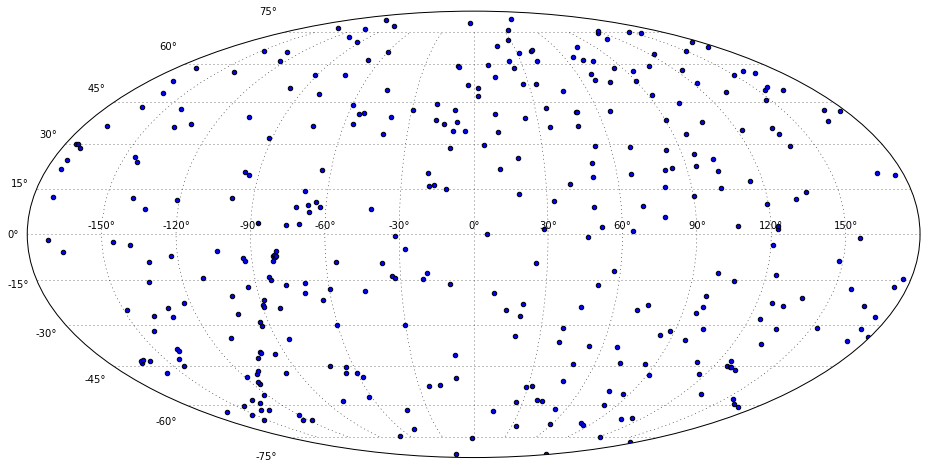

In [8]:
fig = plt.figure(figsize=(16,14))

ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(ra.radian, dec.radian)
ax.grid(True)
